In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!unzip /content/drive/MyDrive/my_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: my_data/train/Measles/MSL_40_01_3.jpg  
  inflating: my_data/train/Measles/MSL_40_01_4.jpg  
  inflating: my_data/train/Measles/MSL_40_01_5.jpg  
  inflating: my_data/train/Measles/MSL_40_01_6.jpg  
  inflating: my_data/train/Measles/MSL_40_01_7.jpg  
  inflating: my_data/train/Measles/MSL_40_01_8.jpg  
  inflating: my_data/train/Measles/MSL_40_01_ORIGINAL.jpg  
  inflating: my_data/train/Measles/MSL_40_02_1.jpg  
  inflating: my_data/train/Measles/MSL_40_02_10.jpg  
  inflating: my_data/train/Measles/MSL_40_02_12.jpg  
  inflating: my_data/train/Measles/MSL_40_02_13.jpg  
  inflating: my_data/train/Measles/MSL_40_02_2.jpg  
  inflating: my_data/train/Measles/MSL_40_02_4.jpg  
  inflating: my_data/train/Measles/MSL_40_02_5.jpg  
  inflating: my_data/train/Measles/MSL_40_02_6.jpg  
  inflating: my_data/train/Measles/MSL_40_02_8.jpg  
  inflating: my_data/train/Measles/MSL_40_02_9.jpg  
  inflating: my_data/train/Measles/MSL

In [ ]:
!pip install --upgrade tensorflow
!pip install mplcyberpunk
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [ ]:

import pathlib, os, random, mplcyberpunk
import numpy as np
import pandas as pd
from glob import glob
import random
from skimage.io import imread

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
#import image preprocessing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# tensorflow libraries
from keras.models import Sequential, Model
from tensorflow.keras.layers  import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers
from keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation

In [ ]:
#import pretrained models
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetLarge
from keras.applications.nasnet import NASNetMobile
from keras.applications.xception import Xception
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:

base_path = r'/content/my_data/train'

# Create a Pandas DataFrame with a single column
# The column is populated with the list of file/directory names in the 'train_data' directory
pd.DataFrame(
    os.listdir(base_path),
    columns=['File Name']
)

,File Name
0,Benign keratosis-like lesions
1,Cowpox
2,Basal cell carcinoma
3,Squamous cell carcinoma
4,Melanoma
5,Monkeypox
6,Melanocytic nevi
7,Measles
8,Vascular lesions
9,Chickenpox


In [ ]:
import glob
# Get a list of the file paths in the 'train_data' directory
train_files = [i for i in glob.glob(base_path + "/*/*")]

# Randomly shuffle the list of file paths
np.random.shuffle(train_files)

# Extract labels from the directory names of each file path
labels = [os.path.dirname(i).split("/")[-1] for i in train_files]

# Combine file paths & its corresponding labels into a list of tuples
data = zip(train_files, labels)

# Create a Pandas DataFrame with 2 columns
# "Path" column contains file paths, & "Label" column contains corresponding labels
training_data = pd.DataFrame(data, columns=["Path", "Label"])

# Display the contents of the DataFrame
training_data

,Path,Label
0,/content/my_data/train/Melanocytic nevi/ISIC_0...,Melanocytic nevi
1,/content/my_data/train/Chickenpox/CHP_49_01_13...,Chickenpox
2,/content/my_data/train/Squamous cell carcinoma...,Squamous cell carcinoma
3,/content/my_data/train/Benign keratosis-like l...,Benign keratosis-like lesions
4,/content/my_data/train/Cowpox/CWP_37_05_4.jpg,Cowpox
...,...,...
10935,/content/my_data/train/Benign keratosis-like l...,Benign keratosis-like lesions
10936,/content/my_data/train/Basal cell carcinoma/IS...,Basal cell carcinoma
10937,/content/my_data/train/Chickenpox/CHP_41_01_9.jpg,Chickenpox
10938,/content/my_data/train/Squamous cell carcinoma...,Squamous cell carcinoma


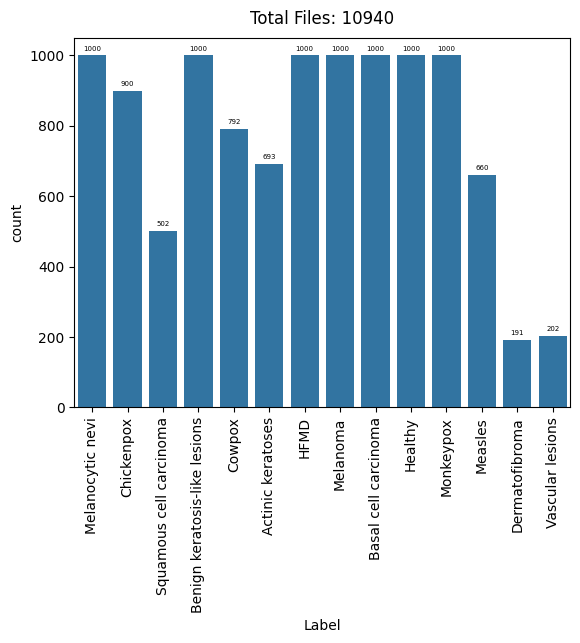

In [ ]:
import seaborn as sns           # Seaborn
# Create a countplot() using Seaborn, where x-axis represents the "Label" column of the training_data DataFrame
ax = sns.countplot(x=training_data["Label"])

# Display count inside each bar as integers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=5)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add a title with the total count of files
plt.title(f'Total Files: {len(training_data)}', pad=10)

# Show the plot
plt.show()

In [ ]:
data_paths = []
labels = []

main_dirs = os.listdir(base_path)
for folder_name in main_dirs:
    folder_path = os.path.join(base_path, folder_name)
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        data_paths.append(file_path)
        labels.append(folder_name)

In [ ]:
# scikit-learn
from sklearn.model_selection import train_test_split

# Set the batch size for training
batch_size = 20

# Define the target image size for preprocessing
image_size = (200, 200)

# Specify the number of color channels in the images (3 for RGB)
num_channels = 3

# Create the image shape tuple based on the specified size and channels
image_shape = (image_size[0], image_size[1], num_channels)

# Create a Pandas Series containing file paths with the name 'Path'
data_dirs = pd.Series(data_paths, name='Path')

# Create a Pandas Series containing corresponding labels with the name 'Label'
classes = pd.Series(labels, name='Label')

def preprocess_image(img):
    return img

# Split the data into training and validation-test sets
train_df, val_test_df = train_test_split(
    training_data,
    train_size=0.8,
    shuffle=True,
    random_state=123
)

# ImageDataGenerator configuration
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image,
    rescale=1.0/255
)

# Convert the 'Label' column to string type
train_df['Label'] = train_df['Label'].astype(str)

# Create generators for training, validation, and testing
train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='Path',
    y_col='Label',
    target_size=image_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

Found 8752 validated image filenames belonging to 14 classes.


In [ ]:
# Get the class indices (mapping of the class names to numerical indices) from the training generator
class_indices = train_generator.class_indices

# Display the keys (class names) from the class_indices dictionary
class_indices.keys()

dict_keys(['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis-like lesions', 'Chickenpox', 'Cowpox', 'Dermatofibroma', 'HFMD', 'Healthy', 'Measles', 'Melanocytic nevi', 'Melanoma', 'Monkeypox', 'Squamous cell carcinoma', 'Vascular lesions'])

In [ ]:
# Initialize an empty list to store class labels
labels = []

# Iterate through the keys (class names) in the class_indices dictionary
for key in class_indices.keys():
    labels.append(key)  # Append each class name to the labels list

# Calculate the total no. of unique labels
total_labels = len(labels)

# Print the list of class labels and the total no. of unique labels
print("Labels: ", labels)
print("\nTotal no. of unique labels:", total_labels)

Labels:  ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis-like lesions', 'Chickenpox', 'Cowpox', 'Dermatofibroma', 'HFMD', 'Healthy', 'Measles', 'Melanocytic nevi', 'Melanoma', 'Monkeypox', 'Squamous cell carcinoma', 'Vascular lesions']

Total no. of unique labels: 14


**Visualize a Subset of Images from the Training Set**

(680, 1024, 3)
(224, 224, 3)
(1024, 1024, 3)
(680, 1024, 3)
(126, 126, 3)
(450, 600, 3)
(802, 919, 3)
(224, 224, 3)
(151, 151, 3)
(450, 600, 3)
(1024, 1024, 3)
(768, 1024, 3)
(1024, 1024, 3)
(802, 919, 3)
(450, 600, 3)
(183, 183, 3)
(450, 600, 3)
(680, 1024, 3)
(1024, 1024, 3)
(159, 159, 3)


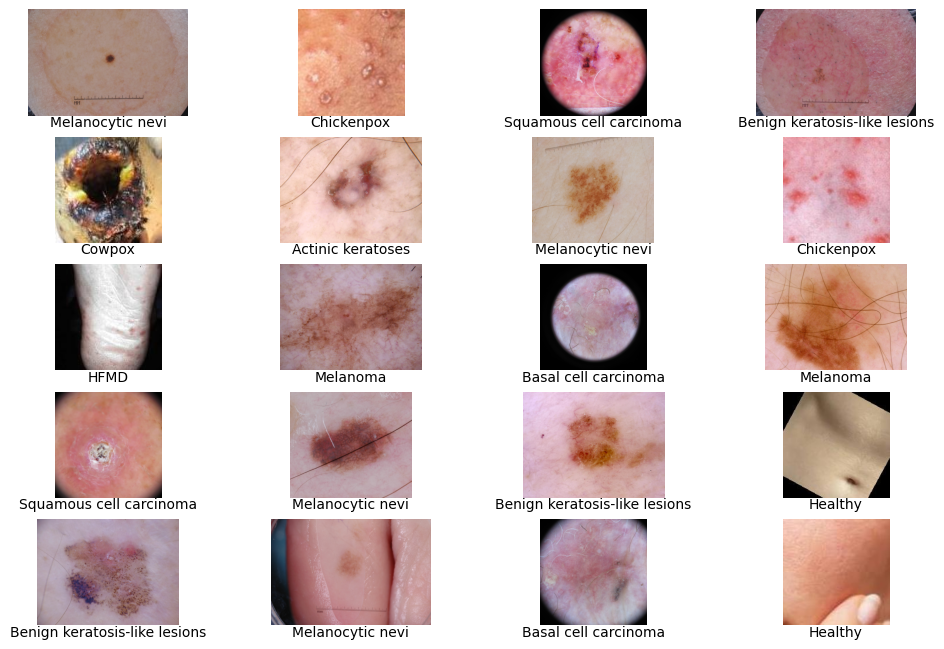

In [ ]:
# Import the Image module from the PIL library
from PIL import Image

# Set the number of rows and columns for the subplot grid
no_of_rows = 5
no_of_columns = 4

# Create a subplot grid with the specified number of rows and columns
fig, axes = plt.subplots(no_of_rows, no_of_columns, figsize=(12, 8))

# Iterate through the rows
for i in range(no_of_rows):
    # Iterate through the columns
    for j in range(no_of_columns):
        # Calculate the index for accessing the data
        index = i * no_of_columns + j

        # Check if the index is within the bounds of the data
        if index < len(training_data):

            # Open the image using the PIL library
            im = Image.open(training_data.iloc[index]['Path'])

            # Convert the PIL image to a NumPy array
            img = np.array(im)

            # Print the shape of the image array
            print(img.shape)

            # Display the image on the subplot at position (i, j)
            axes[i, j].imshow(img)

            # Turn off axis labels for better visualization
            axes[i, j].axis('off')

            # Get the label for the current image and display it as text
            label = training_data.iloc[index]['Label']
            axes[i, j].text(0.5, -0.1, label, ha='center', transform=axes[i, j].transAxes)

# Show the entire subplot grid
plt.show()

### VI. Build Model

# MobileNet model

## Simulation 1

In [ ]:
!pip install split-folders  # Install the split-folders module
import splitfolders  # Import the module
splitfolders.ratio(base_path, output='lesion1_Imgs', seed=123, ratio=(0.6, 0.2, 0.2),
                  group_prefix=None)

Copying files: 10940 files [00:02, 4262.34 files/s]


In [ ]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('lesion1_Imgs/train', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('lesion1_Imgs/test', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('lesion1_Imgs/val', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 6562 images belonging to 14 classes.
Found 2192 images belonging to 14 classes.
Found 2186 images belonging to 14 classes.


In [ ]:
from tensorflow.keras.applications import MobileNet

# Initialize MobileNet model
model = MobileNet(weights='imagenet', include_top=False, input_shape=image_shape)


new_mobilenet_model = tf.keras.models.Sequential()
new_mobilenet_model.add(model)
new_mobilenet_model.add(Flatten())
new_mobilenet_model.add(Dense(14, activation='softmax'))
new_mobilenet_model.layers[0].trainable = False
new_mobilenet_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


<ipython-input-18-3263623984>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNet(weights='imagenet', include_top=False, input_shape=image_shape)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = new_mobilenet_model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - accuracy: 0.4416 - loss: 15.1220 - val_accuracy: 0.6377 - val_loss: 9.6701
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.7671 - loss: 4.1469 - val_accuracy: 0.6638 - val_loss: 7.8936
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.8670 - loss: 1.7257 - val_accuracy: 0.7196 - val_loss: 4.6659
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.9105 - loss: 0.8505 - val_accuracy: 0.7059 - val_loss: 5.6092
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.9408 - loss: 0.4646 - val_accuracy: 0.7283 - val_loss: 4.3149
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.9664 - loss: 0.2506 - val_accuracy: 0.6944 - val_loss: 7.0775
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.9810 - loss: 0.1250 - val_accuracy: 0.7365 - val_loss: 4.1432
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.9820 - loss: 0.1043 - val_acc

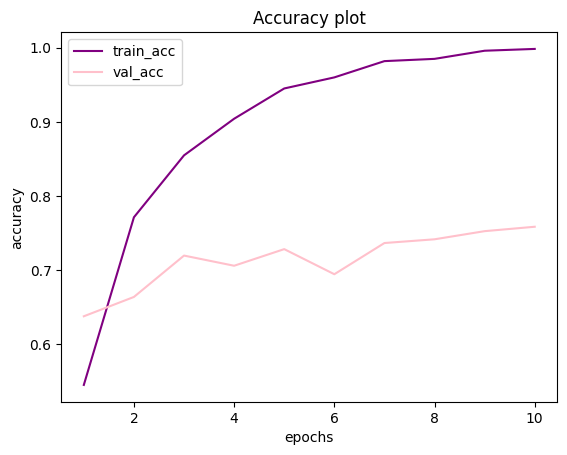

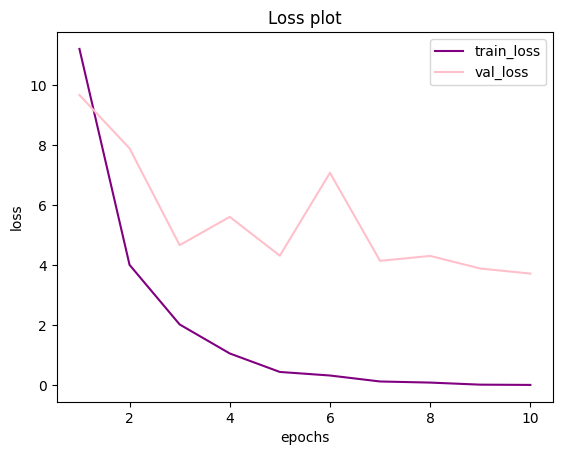

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction = new_mobilenet_model.predict(test_data, steps=int(np.ceil(test_data.samples/test_data.batch_size)), verbose=1) # Convert steps to integer
prediction = (prediction > 0.5)
prediction

110/110 ━━━━━━━━━━━━━━━━━━━━ 86s 778ms/step


array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]])

In [ ]:
val_labels=test_data.classes
val_labels

array([ 0,  0,  0, ..., 13, 13, 13], dtype=int32)

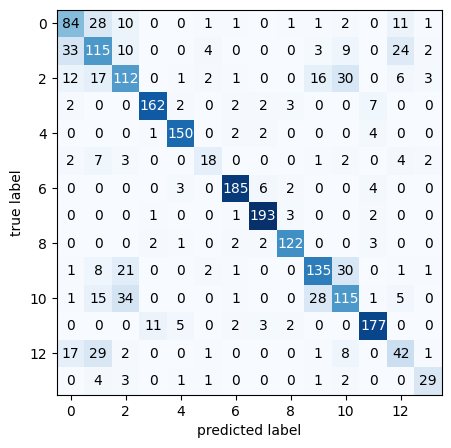

In [ ]:
# prompt: draw the confusion matrix for the predictions

import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Assuming 'prediction' and 'test_data.classes' are defined as in your provided code

# Convert prediction probabilities to class labels (assuming binary classification)
predicted_labels = np.argmax(prediction, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_data.classes, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(cm, figsize=(5, 5))
plt.show()


## Simulation 2

In [ ]:
splitfolders.ratio(base_path, output='lesion2_Imgs', seed=123, ratio=(0.7, 0.15, 0.15),
                  group_prefix=None)

Copying files: 10940 files [00:02, 4179.13 files/s]


In [ ]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('lesion2_Imgs/train', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('lesion2_Imgs/test', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('lesion2_Imgs/val', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 7655 images belonging to 14 classes.
Found 1647 images belonging to 14 classes.
Found 1638 images belonging to 14 classes.


In [ ]:
from tensorflow.keras.applications import MobileNet

# Initialize MobileNet model
model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)


new_mobilenet_model = tf.keras.models.Sequential()
new_mobilenet_model.add(model)
new_mobilenet_model.add(Flatten())
new_mobilenet_model.add(Dense(14, activation='softmax'))
new_mobilenet_model.layers[0].trainable = False
new_mobilenet_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


<ipython-input-26-1303403874>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)


In [ ]:
history = new_mobilenet_model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 370s 962ms/step - accuracy: 0.4501 - loss: 16.0328 - val_accuracy: 0.5580 - val_loss: 19.9048
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 359s 938ms/step - accuracy: 0.7707 - loss: 3.9685 - val_accuracy: 0.6129 - val_loss: 10.9050
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 352s 920ms/step - accuracy: 0.8596 - loss: 1.9013 - val_accuracy: 0.7167 - val_loss: 5.5974
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 353s 921ms/step - accuracy: 0.9192 - loss: 0.8658 - val_accuracy: 0.7283 - val_loss: 4.7763
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 354s 925ms/step - accuracy: 0.9409 - loss: 0.4618 - val_accuracy: 0.7277 - val_loss: 4.5592
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 351s 918ms/step - accuracy: 0.9707 - loss: 0.2041 - val_accuracy: 0.7277 - val_loss: 4.8837
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 349s 911ms/step - accuracy: 0.9779 - loss: 0.1383 - val_accuracy: 0.7393 - val_loss: 3.8739
Epoch 8/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 347s 906ms/step - accuracy: 0.989

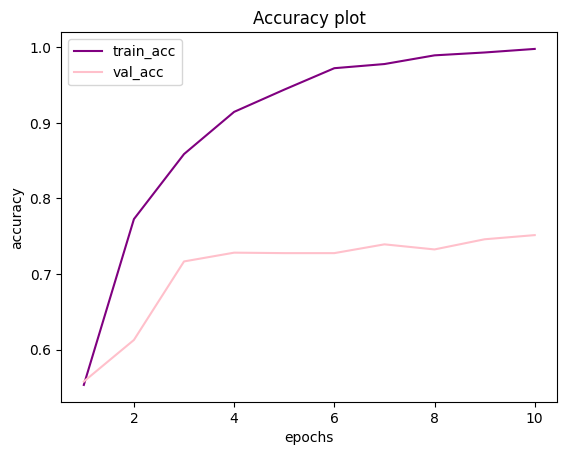

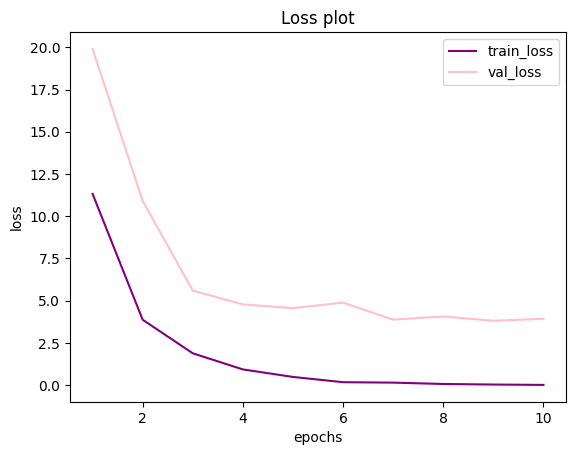

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction = new_mobilenet_model.predict(test_data, steps=int(np.ceil(test_data.samples/test_data.batch_size)), verbose=1) # Convert steps to integer
prediction = (prediction > 0.5)
prediction

83/83 ━━━━━━━━━━━━━━━━━━━━ 65s 771ms/step


array([[False, False, False, ..., False,  True, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]])

In [ ]:
val_labels=test_data.classes
val_labels

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Assuming 'prediction' and 'test_data.classes' are defined as in your provided code

# Convert prediction probabilities to class labels (assuming binary classification)
predicted_labels = np.argmax(prediction, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_data.classes, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(cm, figsize=(5, 5))
plt.show()

print(accuracy_score(test_data.classes, predicted_labels))
print(classification_report(test_data.classes, predicted_labels))


## Simulation 3

In [ ]:
!pip install split-folders  # Install the split-folders module
import splitfolders  # Import the module
splitfolders.ratio(base_path, output='lesion3_Imgs', seed=123, ratio=(0.8, 0.1, 0.1),
                  group_prefix=None)

Copying files: 10940 files [00:22, 483.84 files/s]


In [ ]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('lesion3_Imgs/train', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('lesion3_Imgs/test', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('lesion3_Imgs/val', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 8749 images belonging to 14 classes.
Found 2192 images belonging to 14 classes.
Found 3279 images belonging to 14 classes.


In [ ]:
from tensorflow.keras.applications import MobileNet

# Initialize MobileNet model
model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)


new_mobilenet_model = tf.keras.models.Sequential()
new_mobilenet_model.add(model)
new_mobilenet_model.add(Flatten())
new_mobilenet_model.add(Dense(14, activation='softmax'))
new_mobilenet_model.layers[0].trainable = False
new_mobilenet_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


<ipython-input-23-1303403874>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)


In [ ]:
history = new_mobilenet_model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 86s 183ms/step - accuracy: 0.4716 - loss: 14.9166 - val_accuracy: 0.7371 - val_loss: 4.5277
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 64s 145ms/step - accuracy: 0.7824 - loss: 3.6213 - val_accuracy: 0.8204 - val_loss: 2.6922
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 61s 139ms/step - accuracy: 0.8592 - loss: 1.8550 - val_accuracy: 0.8670 - val_loss: 1.9160
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 61s 140ms/step - accuracy: 0.9113 - loss: 1.0539 - val_accuracy: 0.8307 - val_loss: 2.8652
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 60s 137ms/step - accuracy: 0.9354 - loss: 0.6673 - val_accuracy: 0.8582 - val_loss: 2.2323
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 66s 150ms/step - accuracy: 0.9623 - loss: 0.2730 - val_accuracy: 0.8844 - val_loss: 1.7852
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 61s 140ms/step - accuracy: 0.9655 - loss: 0.2731 - val_accuracy: 0.8972 - val_loss: 1.5252
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 60s 138ms/step - accuracy: 0.9880 - loss: 

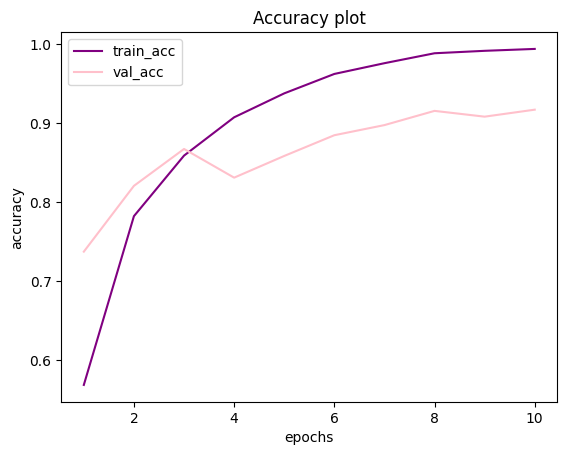

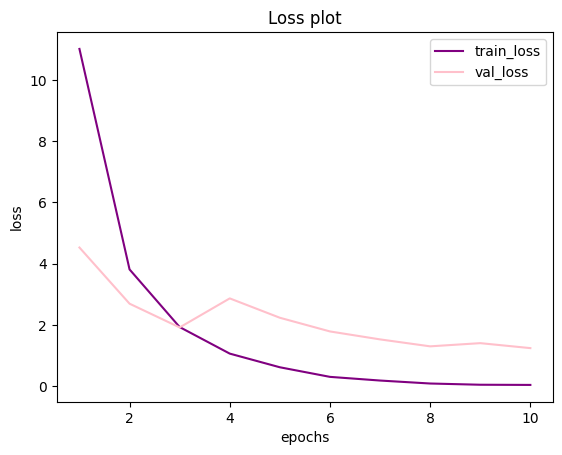

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction = new_mobilenet_model.predict(test_data, steps=int(np.ceil(test_data.samples/test_data.batch_size)), verbose=1) # Convert steps to integer
prediction = (prediction > 0.5)
prediction

110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 140ms/step


array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]])

In [ ]:
val_labels=test_data.classes
val_labels

array([ 0,  0,  0, ..., 13, 13, 13], dtype=int32)

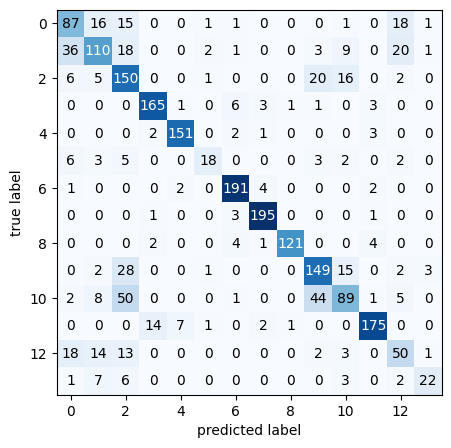

In [ ]:
# prompt: draw the confusion matrix for the predictions

import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Assuming 'prediction' and 'test_data.classes' are defined as in your provided code

# Convert prediction probabilities to class labels (assuming binary classification)
predicted_labels = np.argmax(prediction, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_data.classes, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(cm, figsize=(5, 5))
plt.show()


In [ ]:
print(accuracy_score(test_data.classes, predicted_labels))
print(classification_report(test_data.classes, predicted_labels))

0.7632299270072993
              precision    recall  f1-score   support

           0       0.55      0.62      0.59       140
           1       0.67      0.55      0.60       200
           2       0.53      0.75      0.62       200
           3       0.90      0.92      0.91       180
           4       0.94      0.95      0.94       159
           5       0.75      0.46      0.57        39
           6       0.91      0.95      0.93       200
           7       0.95      0.97      0.96       200
           8       0.98      0.92      0.95       132
           9       0.67      0.74      0.71       200
          10       0.64      0.45      0.53       200
          11       0.93      0.88      0.90       200
          12       0.50      0.50      0.50       101
          13       0.79      0.54      0.64        41

    accuracy                           0.76      2192
   macro avg       0.76      0.73      0.74      2192
weighted avg       0.77      0.76      0.76      2192



# VGG19 model

## Simulation 1

In [ ]:
!pip install split-folders  # Install the split-folders module
import splitfolders  # Import the module
splitfolders.ratio(base_path, output='lesion1_Imgs', seed=123, ratio=(0.6, 0.2, 0.2),
                  group_prefix=None)

Copying files: 10940 files [00:09, 1097.62 files/s]


In [ ]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('lesion1_Imgs/train', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('lesion1_Imgs/test', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('lesion1_Imgs/val', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 6562 images belonging to 14 classes.
Found 2192 images belonging to 14 classes.
Found 2186 images belonging to 14 classes.


In [ ]:
from tensorflow.keras.applications import VGG19

# Initialize MobileNet model
model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)


new_VGG_model = tf.keras.models.Sequential()
new_VGG_model.add(model)
new_VGG_model.add(Flatten())
new_VGG_model.add(Dense(14, activation='softmax'))
new_VGG_model.layers[0].trainable = False
new_VGG_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
history = new_VGG_model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 96s 266ms/step - accuracy: 0.1177 - loss: 15.1594 - val_accuracy: 0.2502 - val_loss: 11.8051
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 68s 206ms/step - accuracy: 0.2146 - loss: 9.7440 - val_accuracy: 0.2342 - val_loss: 6.4254
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 65s 198ms/step - accuracy: 0.2788 - loss: 7.1496 - val_accuracy: 0.2598 - val_loss: 6.6309
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 66s 200ms/step - accuracy: 0.3158 - loss: 6.1226 - val_accuracy: 0.3435 - val_loss: 6.7583
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 66s 199ms/step - accuracy: 0.3538 - loss: 5.4758 - val_accuracy: 0.3307 - val_loss: 5.1057
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 65s 198ms/step - accuracy: 0.3655 - loss: 5.3519 - val_accuracy: 0.4113 - val_loss: 3.7488
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 65s 198ms/step - accuracy: 0.4337 - loss: 3.9525 - val_accuracy: 0.2635 - val_loss: 7.4064
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 68s 207ms/step - accuracy: 0.4075 - loss:

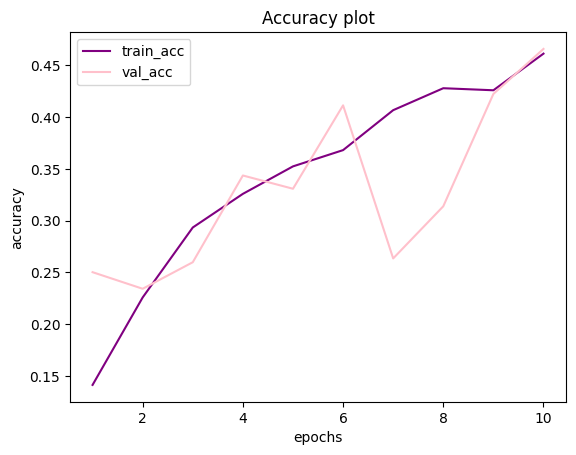

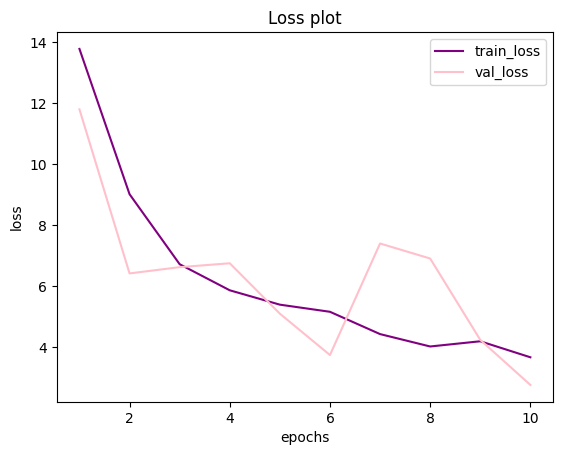

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction = new_VGG_model.predict(test_data, steps=int(np.ceil(test_data.samples/test_data.batch_size)), verbose=1) # Convert steps to integer
prediction = (prediction > 0.5)
prediction

110/110 ━━━━━━━━━━━━━━━━━━━━ 34s 298ms/step


array([[False, False, False, ..., False,  True, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [ ]:
val_labels=test_data.classes
val_labels

array([ 0,  0,  0, ..., 13, 13, 13], dtype=int32)

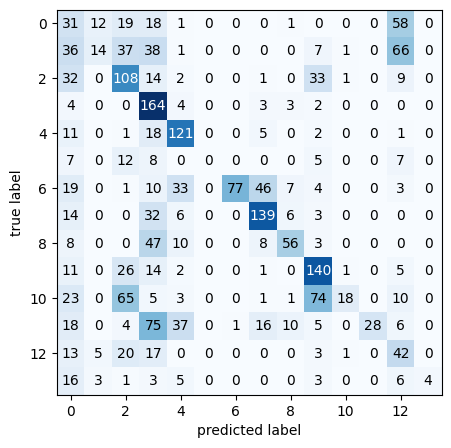

In [ ]:
# prompt: draw the confusion matrix for the predictions

import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Assuming 'prediction' and 'test_data.classes' are defined as in your provided code

# Convert prediction probabilities to class labels (assuming binary classification)
predicted_labels = np.argmax(prediction, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_data.classes, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(cm, figsize=(5, 5))
plt.show()


## Simulation 2

In [ ]:
splitfolders.ratio(base_path, output='lesion2_Imgs', seed=123, ratio=(0.7, 0.15, 0.15),
                  group_prefix=None)

Copying files: 10940 files [00:25, 430.05 files/s]


In [ ]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('lesion2_Imgs/train', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('lesion2_Imgs/test', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('lesion2_Imgs/val', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 7655 images belonging to 14 classes.
Found 1647 images belonging to 14 classes.
Found 1638 images belonging to 14 classes.


In [ ]:
from tensorflow.keras.applications import VGG19

# Initialize MobileNet model
model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)


new_VGG_model = tf.keras.models.Sequential()
new_VGG_model.add(model)
new_VGG_model.add(Flatten())
new_VGG_model.add(Dense(14, activation='softmax'))
new_VGG_model.layers[0].trainable = False
new_VGG_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = new_VGG_model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 111s 284ms/step - accuracy: 0.1246 - loss: 14.7492 - val_accuracy: 0.1850 - val_loss: 10.7929
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 77s 201ms/step - accuracy: 0.2348 - loss: 8.4938 - val_accuracy: 0.1606 - val_loss: 9.1948
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 69s 180ms/step - accuracy: 0.2854 - loss: 6.7837 - val_accuracy: 0.3168 - val_loss: 5.5887
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 76s 198ms/step - accuracy: 0.3276 - loss: 5.8474 - val_accuracy: 0.3822 - val_loss: 4.7815
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 69s 181ms/step - accuracy: 0.3704 - loss: 4.9500 - val_accuracy: 0.4359 - val_loss: 2.8092
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 69s 180ms/step - accuracy: 0.4060 - loss: 4.2292 - val_accuracy: 0.4212 - val_loss: 6.0487
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 82s 181ms/step - accuracy: 0.4155 - loss: 4.1306 - val_accuracy: 0.2973 - val_loss: 7.1129
Epoch 8/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 69s 180ms/step - accuracy: 0.4304 - loss

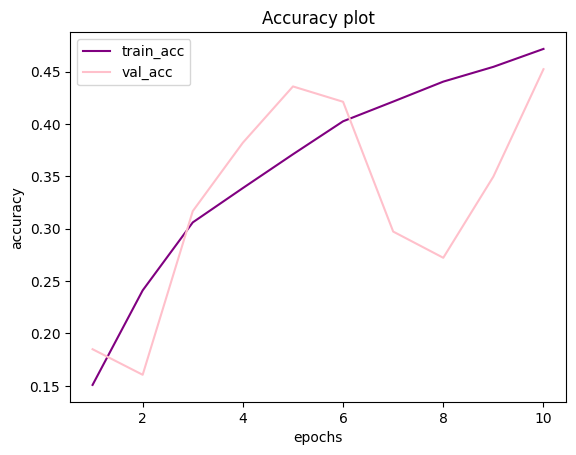

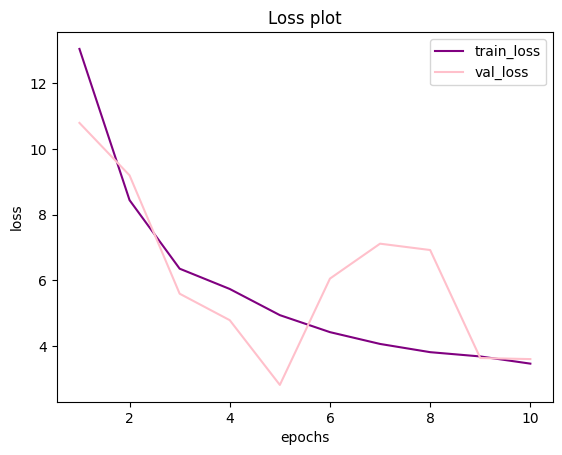

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction = new_VGG_model.predict(test_data, steps=int(np.ceil(test_data.samples/test_data.batch_size)), verbose=1) # Convert steps to integer
prediction = (prediction > 0.5)
prediction

83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 222ms/step


array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
val_labels=test_data.classes
val_labels

array([ 0,  0,  0, ..., 13, 13, 13], dtype=int32)

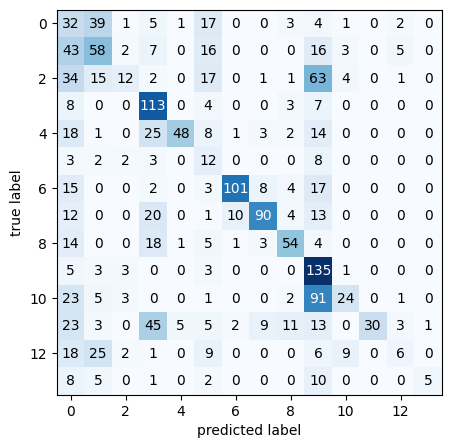

0.4371584699453552
              precision    recall  f1-score   support

           0       0.12      0.30      0.18       105
           1       0.37      0.39      0.38       150
           2       0.48      0.08      0.14       150
           3       0.47      0.84      0.60       135
           4       0.87      0.40      0.55       120
           5       0.12      0.40      0.18        30
           6       0.88      0.67      0.76       150
           7       0.79      0.60      0.68       150
           8       0.64      0.54      0.59       100
           9       0.34      0.90      0.49       150
          10       0.57      0.16      0.25       150
          11       1.00      0.20      0.33       150
          12       0.33      0.08      0.13        76
          13       0.83      0.16      0.27        31

    accuracy                           0.44      1647
   macro avg       0.56      0.41      0.39      1647
weighted avg       0.59      0.44      0.43      1647



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Assuming 'prediction' and 'test_data.classes' are defined as in your provided code

# Convert prediction probabilities to class labels (assuming binary classification)
predicted_labels = np.argmax(prediction, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_data.classes, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(cm, figsize=(5, 5))
plt.show()

print(accuracy_score(test_data.classes, predicted_labels))
print(classification_report(test_data.classes, predicted_labels))


## Simulation 3

In [ ]:
!pip install split-folders  # Install the split-folders module
import splitfolders
splitfolders.ratio(base_path, output='lesion3_Imgs', seed=123, ratio=(0.8, 0.1, 0.1),
                  group_prefix=None)

Copying files: 10940 files [00:22, 482.76 files/s] 


In [ ]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('lesion3_Imgs/train', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('lesion3_Imgs/test', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('lesion3_Imgs/val', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 8749 images belonging to 14 classes.
Found 1098 images belonging to 14 classes.
Found 1093 images belonging to 14 classes.


In [ ]:
from tensorflow.keras.applications import VGG19

# Initialize MobileNet model
model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)


new_VGG_model = tf.keras.models.Sequential()
new_VGG_model.add(model)
new_VGG_model.add(Flatten())
new_VGG_model.add(Dense(14, activation='softmax'))
new_VGG_model.layers[0].trainable = False
new_VGG_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
history = new_VGG_model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 100s 202ms/step - accuracy: 0.1245 - loss: 14.8145 - val_accuracy: 0.1775 - val_loss: 8.0906
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 74s 168ms/step - accuracy: 0.2308 - loss: 8.6040 - val_accuracy: 0.2104 - val_loss: 7.1695
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 165ms/step - accuracy: 0.3030 - loss: 6.2691 - val_accuracy: 0.3358 - val_loss: 7.3515
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 164ms/step - accuracy: 0.3415 - loss: 5.3600 - val_accuracy: 0.3458 - val_loss: 3.9474
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 73s 166ms/step - accuracy: 0.3754 - loss: 4.7542 - val_accuracy: 0.3705 - val_loss: 4.8336
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 165ms/step - accuracy: 0.4051 - loss: 4.3469 - val_accuracy: 0.1519 - val_loss: 7.3160
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 165ms/step - accuracy: 0.4265 - loss: 4.1962 - val_accuracy: 0.3952 - val_loss: 3.8152
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 165ms/step - accuracy: 0.4469 - loss:

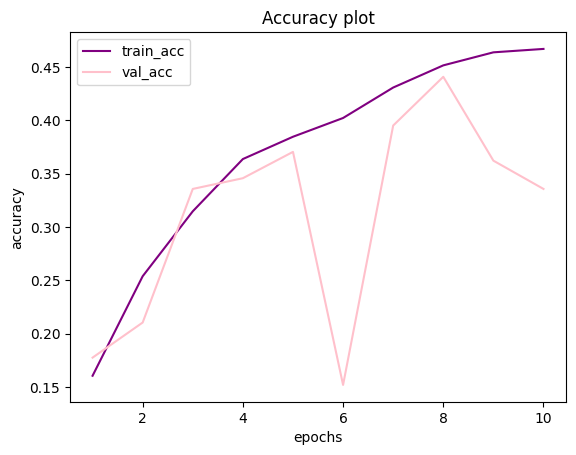

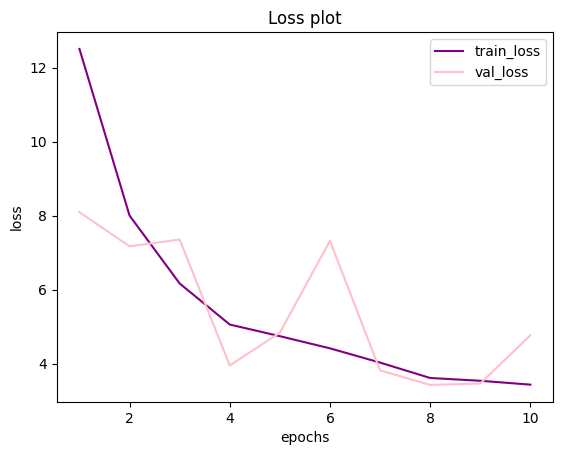

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction = new_VGG_model.predict(test_data, steps=int(np.ceil(test_data.samples/test_data.batch_size)), verbose=1) # Convert steps to integer
prediction = (prediction > 0.5)
prediction

55/55 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step


array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [ ]:
val_labels=test_data.classes
val_labels

array([ 0,  0,  0, ..., 13, 13, 13], dtype=int32)

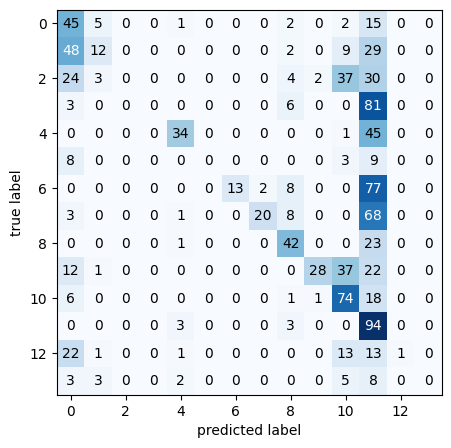

In [ ]:
# prompt: draw the confusion matrix for the predictions

import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Assuming 'prediction' and 'test_data.classes' are defined as in your provided code

# Convert prediction probabilities to class labels (assuming binary classification)
predicted_labels = np.argmax(prediction, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_data.classes, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(cm, figsize=(5, 5))
plt.show()


In [ ]:
print(accuracy_score(test_data.classes, predicted_labels))
print(classification_report(test_data.classes, predicted_labels))

0.33060109289617484
              precision    recall  f1-score   support

           0       0.26      0.64      0.37        70
           1       0.48      0.12      0.19       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00        90
           4       0.79      0.42      0.55        80
           5       0.00      0.00      0.00        20
           6       1.00      0.13      0.23       100
           7       0.91      0.20      0.33       100
           8       0.55      0.64      0.59        66
           9       0.90      0.28      0.43       100
          10       0.41      0.74      0.53       100
          11       0.18      0.94      0.30       100
          12       1.00      0.02      0.04        51
          13       0.00      0.00      0.00        21

    accuracy                           0.33      1098
   macro avg       0.46      0.30      0.25      1098
weighted avg       0.51      0.33      0.28      1098



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# InceptionV3 model

## Simulation 1

In [ ]:
!pip install split-folders  # Install the split-folders module
import splitfolders  # Import the module
splitfolders.ratio(base_path, output='lesion1_Imgs', seed=123, ratio=(0.6, 0.2, 0.2),
                  group_prefix=None)

Copying files: 10940 files [00:25, 424.67 files/s] 


In [ ]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('lesion1_Imgs/train', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('lesion1_Imgs/test', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('lesion1_Imgs/val', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 6562 images belonging to 14 classes.
Found 2192 images belonging to 14 classes.
Found 2186 images belonging to 14 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3

# Initialize MobileNet model
model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)


new_Inception_model = tf.keras.models.Sequential()
new_Inception_model.add(model)
new_Inception_model.add(Flatten())
new_Inception_model.add(Dense(14, activation='softmax'))
new_Inception_model.layers[0].trainable = False
new_Inception_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = new_Inception_model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 91s 222ms/step - accuracy: 0.3588 - loss: 16.0970 - val_accuracy: 0.5101 - val_loss: 6.8981
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 53s 160ms/step - accuracy: 0.6626 - loss: 4.6789 - val_accuracy: 0.5704 - val_loss: 6.9414
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 61s 184ms/step - accuracy: 0.7415 - loss: 3.1696 - val_accuracy: 0.6034 - val_loss: 6.4960
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 56s 170ms/step - accuracy: 0.8018 - loss: 2.1798 - val_accuracy: 0.6272 - val_loss: 5.2506
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 58s 175ms/step - accuracy: 0.8351 - loss: 1.5574 - val_accuracy: 0.6285 - val_loss: 6.9619
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 50s 152ms/step - accuracy: 0.8694 - loss: 1.0455 - val_accuracy: 0.6528 - val_loss: 4.9303
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 50s 153ms/step - accuracy: 0.9020 - loss: 0.7305 - val_accuracy: 0.6601 - val_loss: 4.5603
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 82s 153ms/step - accuracy: 0.9467 - loss: 

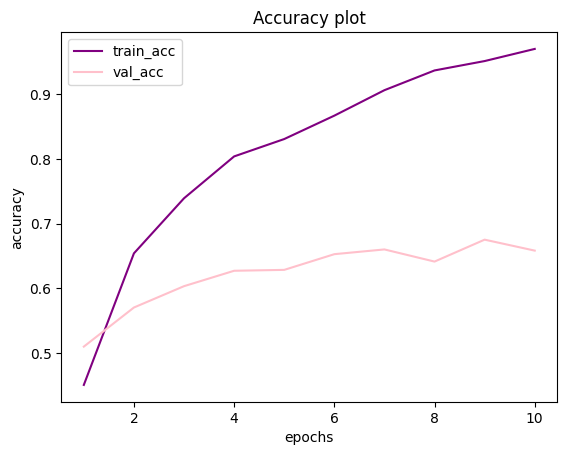

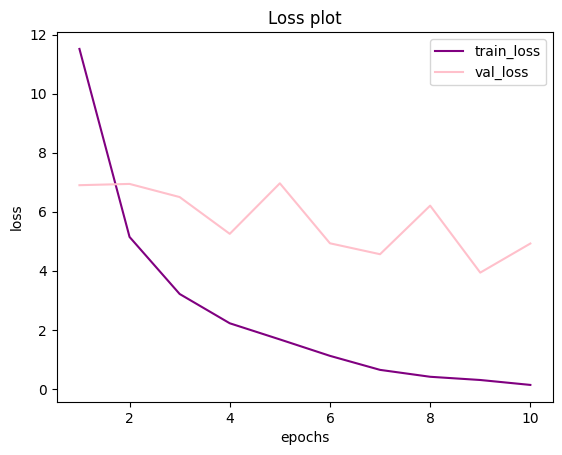

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction = new_Inception_model.predict(test_data, steps=int(np.ceil(test_data.samples/test_data.batch_size)), verbose=1) # Convert steps to integer
prediction = (prediction > 0.5)
prediction

110/110 ━━━━━━━━━━━━━━━━━━━━ 26s 188ms/step


array([[False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
val_labels=test_data.classes
val_labels

array([ 0,  0,  0, ..., 13, 13, 13], dtype=int32)

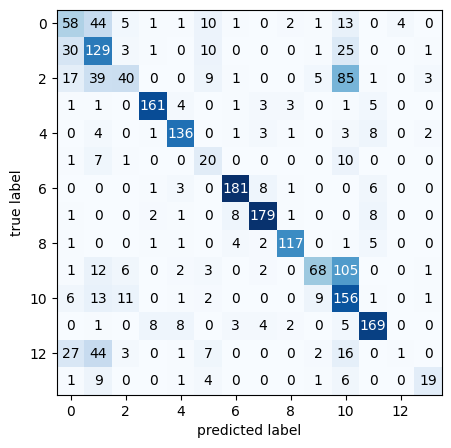

In [ ]:
# prompt: draw the confusion matrix for the predictions

import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Assuming 'prediction' and 'test_data.classes' are defined as in your provided code

# Convert prediction probabilities to class labels (assuming binary classification)
predicted_labels = np.argmax(prediction, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_data.classes, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(cm, figsize=(5, 5))
plt.show()


## Simulation 2

In [ ]:
splitfolders.ratio(base_path, output='lesion2_Imgs', seed=123, ratio=(0.7, 0.15, 0.15),
                  group_prefix=None)

Copying files: 10940 files [00:24, 451.59 files/s] 


In [ ]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('lesion2_Imgs/train', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('lesion2_Imgs/test', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('lesion2_Imgs/val', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 7655 images belonging to 14 classes.
Found 1647 images belonging to 14 classes.
Found 1638 images belonging to 14 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3

# Initialize MobileNet model
model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)


new_Inception_model = tf.keras.models.Sequential()
new_Inception_model.add(model)
new_Inception_model.add(Flatten())
new_Inception_model.add(Dense(14, activation='softmax'))
new_Inception_model.layers[0].trainable = False
new_Inception_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = new_Inception_model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 100s 228ms/step - accuracy: 0.3674 - loss: 15.1712 - val_accuracy: 0.5659 - val_loss: 6.9932
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 64s 166ms/step - accuracy: 0.6511 - loss: 5.3083 - val_accuracy: 0.6123 - val_loss: 5.6936
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 58s 151ms/step - accuracy: 0.7447 - loss: 2.9572 - val_accuracy: 0.5403 - val_loss: 11.5536
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.8215 - loss: 1.9354 - val_accuracy: 0.6685 - val_loss: 4.2838
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 84s 144ms/step - accuracy: 0.8486 - loss: 1.4568 - val_accuracy: 0.6429 - val_loss: 5.5140
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.8677 - loss: 1.1543 - val_accuracy: 0.6642 - val_loss: 4.3675
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 53s 139ms/step - accuracy: 0.9011 - loss: 0.6953 - val_accuracy: 0.6502 - val_loss: 4.4154
Epoch 8/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 53s 139ms/step - accuracy: 0.9316 - loss

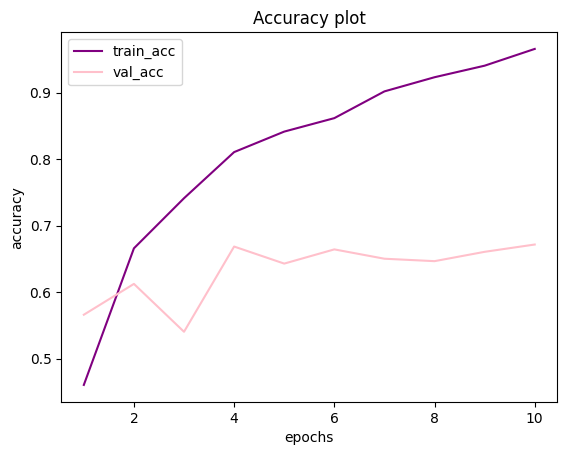

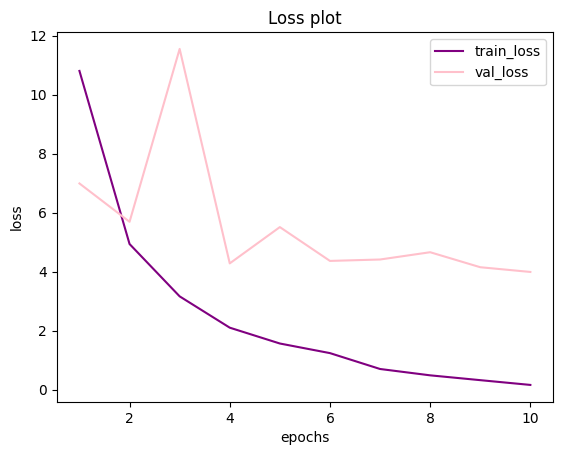

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction = new_Inception_model.predict(test_data, steps=int(np.ceil(test_data.samples/test_data.batch_size)), verbose=1) # Convert steps to integer
prediction = (prediction > 0.5)
prediction

83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 246ms/step


array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

In [ ]:
val_labels=test_data.classes
val_labels

array([ 0,  0,  0, ..., 13, 13, 13], dtype=int32)

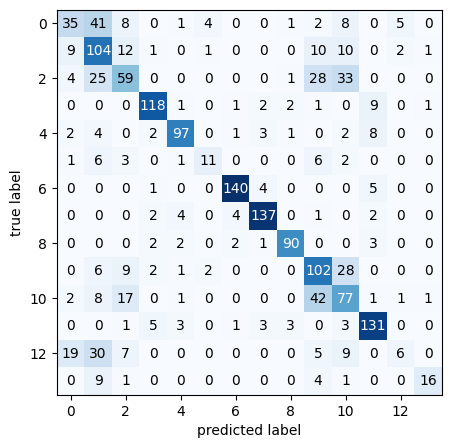

0.6818457802064359
              precision    recall  f1-score   support

           0       0.49      0.33      0.40       105
           1       0.45      0.69      0.54       150
           2       0.50      0.39      0.44       150
           3       0.89      0.87      0.88       135
           4       0.87      0.81      0.84       120
           5       0.61      0.37      0.46        30
           6       0.94      0.93      0.94       150
           7       0.91      0.91      0.91       150
           8       0.92      0.90      0.91       100
           9       0.51      0.68      0.58       150
          10       0.45      0.51      0.48       150
          11       0.82      0.87      0.85       150
          12       0.43      0.08      0.13        76
          13       0.84      0.52      0.64        31

    accuracy                           0.68      1647
   macro avg       0.69      0.63      0.64      1647
weighted avg       0.69      0.68      0.67      1647



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Assuming 'prediction' and 'test_data.classes' are defined as in your provided code

# Convert prediction probabilities to class labels (assuming binary classification)
predicted_labels = np.argmax(prediction, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_data.classes, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(cm, figsize=(5, 5))
plt.show()

print(accuracy_score(test_data.classes, predicted_labels))
print(classification_report(test_data.classes, predicted_labels))


## Simulation 3

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio(base_path, output='lesion3_Imgs', seed=123, ratio=(0.8, 0.1, 0.1),
                  group_prefix=None)

Copying files: 10940 files [00:21, 500.41 files/s]


In [ ]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('lesion3_Imgs/train', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('lesion3_Imgs/test', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('lesion3_Imgs/val', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 8749 images belonging to 14 classes.
Found 1098 images belonging to 14 classes.
Found 1093 images belonging to 14 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3

# Initialize MobileNet model
model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)


new_Inception_model = tf.keras.models.Sequential()
new_Inception_model.add(model)
new_Inception_model.add(Flatten())
new_Inception_model.add(Dense(14, activation='softmax'))
new_Inception_model.layers[0].trainable = False
new_Inception_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
history = new_Inception_model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 115s 204ms/step - accuracy: 0.3752 - loss: 14.9496 - val_accuracy: 0.5672 - val_loss: 7.1158
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - accuracy: 0.6676 - loss: 4.6310 - val_accuracy: 0.6057 - val_loss: 8.1266
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 55s 126ms/step - accuracy: 0.7465 - loss: 3.2674 - val_accuracy: 0.6377 - val_loss: 4.9713
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 132ms/step - accuracy: 0.8057 - loss: 2.0804 - val_accuracy: 0.6038 - val_loss: 7.0968
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 55s 125ms/step - accuracy: 0.8312 - loss: 1.6358 - val_accuracy: 0.6725 - val_loss: 4.2112
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 59s 135ms/step - accuracy: 0.8715 - loss: 1.2161 - val_accuracy: 0.6432 - val_loss: 6.6539
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 56s 127ms/step - accuracy: 0.9083 - loss: 0.7695 - val_accuracy: 0.6743 - val_loss: 6.2481
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 59s 135ms/step - accuracy: 0.9078 - loss:

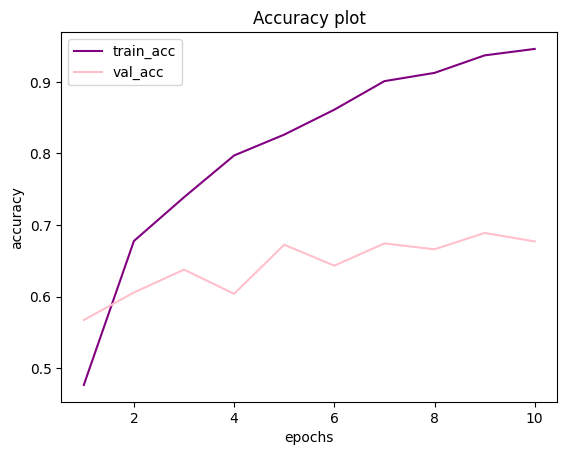

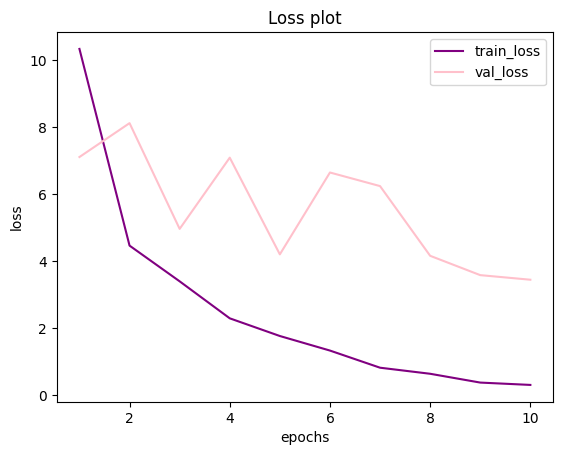

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
import numpy as np
prediction = new_Inception_model.predict(test_data, steps=int(np.ceil(test_data.samples/test_data.batch_size)), verbose=1) # Convert steps to integer
prediction = (prediction > 0.5)
prediction

55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step


array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [ ]:
val_labels=test_data.classes
val_labels

array([ 0,  0,  0, ..., 13, 13, 13], dtype=int32)

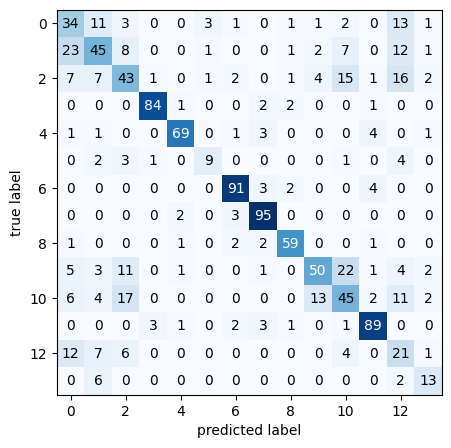

In [ ]:
# prompt: draw the confusion matrix for the predictions

import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Assuming 'prediction' and 'test_data.classes' are defined as in your provided code

# Convert prediction probabilities to class labels (assuming binary classification)
predicted_labels = np.argmax(prediction, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_data.classes, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(cm, figsize=(5, 5))
plt.show()


In [ ]:
print(accuracy_score(test_data.classes, predicted_labels))
print(classification_report(test_data.classes, predicted_labels))

0.680327868852459
              precision    recall  f1-score   support

           0       0.38      0.49      0.43        70
           1       0.52      0.45      0.48       100
           2       0.47      0.43      0.45       100
           3       0.94      0.93      0.94        90
           4       0.92      0.86      0.89        80
           5       0.64      0.45      0.53        20
           6       0.89      0.91      0.90       100
           7       0.87      0.95      0.91       100
           8       0.88      0.89      0.89        66
           9       0.71      0.50      0.59       100
          10       0.46      0.45      0.46       100
          11       0.86      0.89      0.88       100
          12       0.25      0.41      0.31        51
          13       0.57      0.62      0.59        21

    accuracy                           0.68      1098
   macro avg       0.67      0.66      0.66      1098
weighted avg       0.69      0.68      0.68      1098



# Saving the model

In [ ]:
new_Inception_model.save("/content/drive/MyDrive/mymodel.keras")

# Testing Model

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/mymodel.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

# Load image (replace with your own path)
img_path = '/content/monkey.jpeg'
class_names = ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis-like lesions', 'Chickenpox', 'Cowpox', 'Dermatofibroma', 'HFMD', 'Healthy', 'Measles', 'Melanocytic nevi', 'Melanoma', 'Monkeypox', 'Squamous cell carcinoma', 'Vascular lesions']

# Convert to array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Normalize as needed
img_array = preprocess_input(img_array)  # Use if you used InceptionV3, MobileNet, etc.

def predict_skin_lesion(image_path, model, class_names, img_size=(200, 200, 3)):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # if pretrained
    pred = model.predict(img_array)
    class_index = np.argmax(pred)
    confidence = np.max(pred)
    return class_names[class_index], confidence
label, conf = predict_skin_lesion(img_path, model, class_names)
print(f"Lesion Type: {label} ({conf*100:.1f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Lesion Type: Monkeypox (100.0%)


# Idle Stuff

In [ ]:
new_model.save('inception_model.h5')

In [ ]:
!pip install -q tensorflow opencv-python-headless
import tensorflow as tf
import numpy as np
import cv2
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow

In [ ]:
def capture_image():
    js = Javascript('''
    async function takePhoto() {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📷 Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg');
    }
    takePhoto();
    ''')

    display(js)

    import base64
    from io import BytesIO
    from PIL import Image
    image_data = eval_js("takePhoto()")
    binary = base64.b64decode(image_data.split(',')[1])
    image = Image.open(BytesIO(binary))
    return image


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load your fine-tuned model
model = load_model('inception_model.h5')  # Upload beforehand

# Set image size
input_size = (299, 299)

# Class names
class_names = ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis-like lesions', 'Chickenpox', 'Cowpox', 'Dermatofibroma', 'HFMD', 'Healthy', 'Measles', 'Melanocytic nevi', 'Melanoma', 'Monkeypox', 'Squamous cell carcinoma', 'Vascular lesions']


In [ ]:
# Capture image from webcam
image = capture_image()

# Display the captured image
display(image)

# Preprocess image
image = image.resize(input_size)
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = preprocess_input(image_array)

# Predict
preds = model.predict(image_array)
class_index = np.argmax(preds)
confidence = np.max(preds)
label = class_names[class_index]

print(f"🔍 Prediction: {label} ({confidence*100:.2f}%)")
